In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, label_binarize
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("../drugs.csv")

##### Se convierten columnas cualitativas a numéricas:

In [16]:
cualitativas = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in cualitativas:
    df[col] = label_encoder.fit_transform(df[col])
print(df.head())

   Age  Sex  BP  Cholesterol  Na_to_K  Drug
0   23    0   0            0   25.355     4
1   47    1   1            0   13.093     2
2   47    1   1            0   10.114     2
3   28    0   2            0    7.798     3
4   61    0   1            0   18.043     4


# liblinear

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Separar las características (variables predictoras) y la variable objetivo
X = df.drop('Drug', axis=1) 
y = df['Drug']               

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Crear el modelo de regresión logística con el solver liblinear
model = LogisticRegression(solver='liblinear')

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Matriz de Confusión: \n, {conf_matrix}')
print(f'Informe de Clasificación:\n, {class_report}')
print(f'Precisión del modelo: {accuracy:.2f}')

Matriz de Confusión: 
, [[ 3  1  0  0  0]
 [ 0  2  0  0  0]
 [ 0  2  0  1  1]
 [ 0  0  0 13  0]
 [ 0  0  0  2 15]]
Informe de Clasificación:
,               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.40      1.00      0.57         2
           2       0.00      0.00      0.00         4
           3       0.81      1.00      0.90        13
           4       0.94      0.88      0.91        17

    accuracy                           0.82        40
   macro avg       0.63      0.73      0.65        40
weighted avg       0.78      0.82      0.79        40

Precisión del modelo: 0.82


# lbfgs

In [19]:
# Separar las características (variables predictoras) y la variable objetivo
X = df.drop('Drug', axis=1) 
y = df['Drug']               

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Crear el modelo de regresión logística con el solver liblinear
model = LogisticRegression(solver='lbfgs')

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Matriz de Confusión: \n, {conf_matrix}')
print(f'Informe de Clasificación:\n, {class_report}')
print(f'Precisión del modelo: {accuracy:.2f}')

Matriz de Confusión: 
, [[ 3  1  0  0  0]
 [ 0  2  0  0  0]
 [ 0  1  1  1  1]
 [ 0  0  0 13  0]
 [ 0  0  0  2 15]]
Informe de Clasificación:
,               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.50      1.00      0.67         2
           2       1.00      0.25      0.40         4
           3       0.81      1.00      0.90        13
           4       0.94      0.88      0.91        17

    accuracy                           0.85        40
   macro avg       0.85      0.78      0.75        40
weighted avg       0.89      0.85      0.84        40

Precisión del modelo: 0.85


# Newton-cg

In [20]:
# Separar las características (variables predictoras) y la variable objetivo
X = df.drop('Drug', axis=1) 
y = df['Drug']               

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Crear el modelo de regresión logística con el solver liblinear
model = LogisticRegression(solver='newton-cg')

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Matriz de Confusión: \n, {conf_matrix}')
print(f'Informe de Clasificación:\n, {class_report}')
print(f'Precisión del modelo: {accuracy:.2f}')

Matriz de Confusión: 
, [[ 4  0  0  0  0]
 [ 0  2  0  0  0]
 [ 0  2  2  0  0]
 [ 0  0  0 13  0]
 [ 0  0  0  0 17]]
Informe de Clasificación:
,               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.50      1.00      0.67         2
           2       1.00      0.50      0.67         4
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        17

    accuracy                           0.95        40
   macro avg       0.90      0.90      0.87        40
weighted avg       0.97      0.95      0.95        40

Precisión del modelo: 0.95


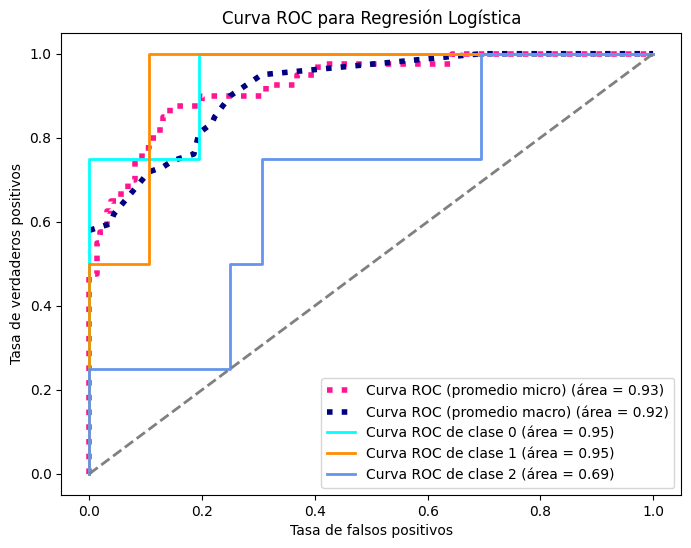

In [23]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Binarizar las etiquetas de la variable objetivo para calcular la curva ROC de múltiples clases
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_binarized.shape[1]

# Predecir probabilidades
y_score = model.predict_proba(X_test)

# Calcular la curva ROC y el AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular la curva ROC y el AUC promedio (micro y macro)
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plotear todas las curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"],
         label='Curva ROC (promedio micro) (área = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)
plt.plot(fpr["macro"], tpr["macro"],
         label='Curva ROC (promedio macro) (área = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Curva ROC de clase {0} (área = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC para Regresión Logística')
plt.legend(loc="lower right")
plt.show()


# SAG

In [21]:
# Separar las características (variables predictoras) y la variable objetivo
X = df.drop('Drug', axis=1) 
y = df['Drug']               

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Crear el modelo de regresión logística con el solver liblinear
model = LogisticRegression(solver='sag')

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Matriz de Confusión: \n, {conf_matrix}')
print(f'Informe de Clasificación:\n, {class_report}')
print(f'Precisión del modelo: {accuracy:.2f}')

Matriz de Confusión: 
, [[ 0  2  0  0  2]
 [ 0  2  0  0  0]
 [ 0  2  0  1  1]
 [ 0  0  0 11  2]
 [ 0  0  0  2 15]]
Informe de Clasificación:
,               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.33      1.00      0.50         2
           2       0.00      0.00      0.00         4
           3       0.79      0.85      0.81        13
           4       0.75      0.88      0.81        17

    accuracy                           0.70        40
   macro avg       0.37      0.55      0.43        40
weighted avg       0.59      0.70      0.63        40

Precisión del modelo: 0.70


# SAGA

In [22]:
# Separar las características (variables predictoras) y la variable objetivo
X = df.drop('Drug', axis=1) 
y = df['Drug']               

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Crear el modelo de regresión logística con el solver liblinear
model = LogisticRegression(solver='saga')

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Matriz de Confusión: \n, {conf_matrix}')
print(f'Informe de Clasificación:\n, {class_report}')
print(f'Precisión del modelo: {accuracy:.2f}')

Matriz de Confusión: 
, [[ 0  2  0  0  2]
 [ 0  2  0  0  0]
 [ 0  2  0  1  1]
 [ 0  0  0 11  2]
 [ 0  0  0  1 16]]
Informe de Clasificación:
,               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.33      1.00      0.50         2
           2       0.00      0.00      0.00         4
           3       0.85      0.85      0.85        13
           4       0.76      0.94      0.84        17

    accuracy                           0.72        40
   macro avg       0.39      0.56      0.44        40
weighted avg       0.62      0.72      0.66        40

Precisión del modelo: 0.72


El método de "Newton-cg" fue el que mejor resultado obtuvo con un accuracy de 97.5%

El modelo muestra un excelente rendimiento en la clasificación de las clases 0 y 1, tiene problemas con la clase 2, como se refleja en la curva ROC y el AUC. El rendimiento general del modelo sigue siendo bueno, como lo indican los promedios micro y macro, pero hay áreas específicas donde se puede mejorar, particularmente en la clasificación de la clase 2.